# First Classification 🐥🐥

0. Import usual libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

1. Download the following data using this link : ```https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+logistique+Cross+validation/Datasets/ex2data1.txt``` and put it into a DataFrame

Pay attention to the header of the DataFrame, there's something annoying with it! Look at the documentation of `pd.read_csv()` to find a way of solving the problem 🤓

In [22]:
data = pd.read_csv('https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+logistique+Cross+validation/Datasets/ex2data1.txt', 
                   header=None)
print("Shape of dataset: ", data.shape)
data.head()

Shape of dataset:  (100, 3)


,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


2. Rename the columns using the following names : 

"Col_1" / "Col_2" / "Target"

In [23]:
col_names = {
    0: "Col_1",
    1: "Col_2",
    2: "Target"
}

data = data.rename(columns= col_names)

data.head()

,Col_1,Col_2,Target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


3. Visualize the data as a scatter plot where the two different classes are displayed with different colors.

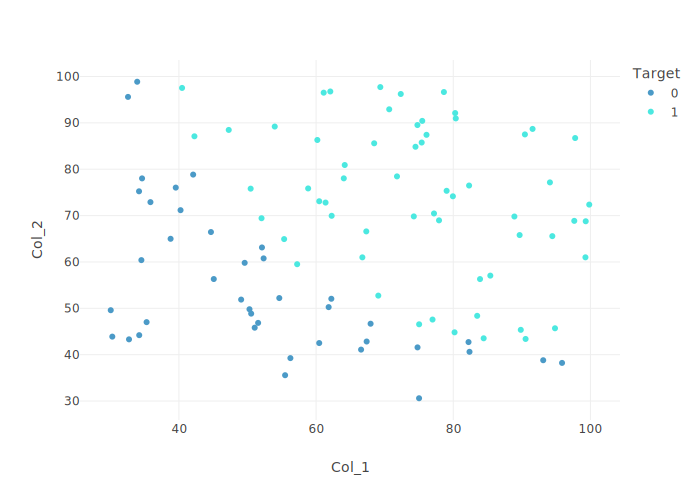

In [24]:
fig = px.scatter(data, x = 'Col_1', y = 'Col_2', color = data['Target'].astype('str'), labels = {'color': 'Target'})
fig.show()

4. Separate X and y into two different objects.

In [25]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "Target"

X = data.drop(target_variable, axis = 1)
Y = data.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    0
3    1
4    1
Name: Target, dtype: int64

X :
       Col_1      Col_2
0  34.623660  78.024693
1  30.286711  43.894998
2  35.847409  72.902198
3  60.182599  86.308552
4  79.032736  75.344376


5. Split the data into a train set and a test set

In [26]:
## Statify splitting when you're training a classification model !
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y ,test_size = 0.2, stratify = Y, random_state = 42)

6. Do you think that the two variables "Col_1" and "Col_2" would be good predictors of the target?

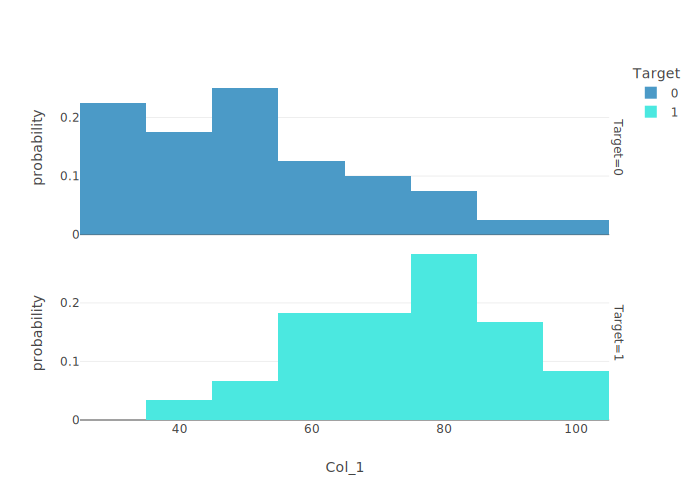

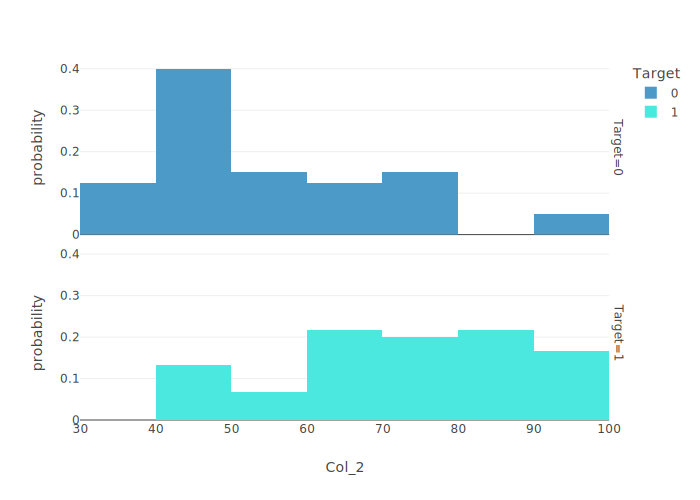

In [27]:
# Univariate analysis
# Distribution of each numeric variable
num_features = ['Col_1', 'Col_2']
for f in num_features:
    fig = px.histogram(data, f, color = 'Target', facet_row = 'Target', histnorm = 'probability')
    fig.show()

The distributions of "Col_1"and "Col_2" seem quite different depending on the values of the target variable. So we can be quite confident that these features will be useful to predict the value of _Target_ 🤞

7. Analyze the explanatory variables, what preprocessings are necessary? Make the preprocessings.

In [28]:
data.describe(include = 'all')

,Col_1,Col_2,Target
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Some good news:
* There are no missing values in this dataset --> no imputation needed
* Although we're dealing with a classification problem, the _Target_ is alrady encoded as 0s and 1s, so we don't need to use the LabelEncoder
* All the features (_Col1_ and _Col2_) are numeric, so we just want to apply a StandardScaler to the whole array X

In [29]:
# Data must be normalized to guarantee that we can interpret the model's parameters
print("Performing preprocessings on train set...")
print(X_train.head())
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = scaler.transform(X_test) ### NO fit on X_test
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on train set...
        Col_1      Col_2
67  49.072563  51.883212
33  52.045405  69.432860
60  75.395611  85.759937
83  57.238706  59.514282
21  89.676776  65.799366
...Done.
[[-0.8284396  -0.77976382]
 [-0.67919821  0.16568501]
 [ 0.4930195   1.04527047]
 [-0.41848617 -0.36865665]
 [ 1.20995678 -0.03006152]]

Performing preprocessings on test set...
        Col_1      Col_2
99  74.775893  89.529813
48  62.073064  96.768824
4   79.032736  75.344376
31  85.404519  57.051984
32  52.107980  63.127624
...Done.
[[ 0.46190865  1.24836429]
 [-0.17579369  1.63835015]
 [ 0.67560897  0.48415499]
 [ 0.99548268 -0.50130755]
 [-0.67605684 -0.17399578]]



8. Use the LogisticRegression function from sklearn in order to create a model instance and train it.

In [30]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

9. What's the accuracy on the train set ? and on the test set ?

Find a way of evaluating the scores without explicitely computing the model's predictions.

In [31]:
# The method .score() from LogisticRegression() returns the accuracy!
print('Train accuracy : {}\nTest accuracy : {}'.format(classifier.score(X_train, Y_train), classifier.score(X_test, Y_test)))

Train accuracy : 0.875
Test accuracy : 0.95


10. What's the average score with a cross-validation using K=10, what's the score's standard deviation?

In [32]:
scores = cross_val_score(classifier,X_train, Y_train, cv=10)
avg = scores.mean()
std = scores.std()
print('Cross-validated accuracy : {}\nstandard deviation : {}'.format(avg, std))

Cross-validated accuracy : 0.875
standard deviation : 0.13693063937629152


11. Is the model underfitting/overfitting?

The test accuracy seems a bit higher than the train accuracy, which is usually not possible (it's as if a student who had not learnt his lesson would miraculously get very good results at the final exam 😇)...
This doesn't correspond to underfitting nor overfitting 🤔

Actually, the cross-validation shows that the score can typically vary by $\pm 0.14$ just by switching some examples between train and test set. We can conclude that there's **no significant difference** between the train score and the test score! The model has a good balance between bias and variance, which is as good news!

12. Create objects containing the model's predictions on the train/test sets, as well as the estimated probabilities

In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = classifier.predict_proba(X_train)
print("...Done.")
print(Y_train_proba[:5])
print()

# It means : probability of O | probabilty of 1

Predictions on training set...
...Done.
[0 0 1 0 1]

Probabilities on training set...
...Done.
[[0.9091756  0.0908244 ]
 [0.5510213  0.4489787 ]
 [0.01891173 0.98108827]
 [0.65836477 0.34163523]
 [0.03075805 0.96924195]]



In [34]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = classifier.predict_proba(X_test)
print("...Done.")
print(Y_test_proba[:5])
print()

Predictions on test set...
...Done.
[1 1 1 1 0]

Probabilities on test set...
...Done.
[[0.0138547  0.9861453 ]
 [0.0255437  0.9744563 ]
 [0.03623478 0.96376522]
 [0.1085291  0.8914709 ]
 [0.69803519 0.30196481]]



13. Display the confusion matrix derived from the predictions performed by your model on the training data, do the same on your test data. What do you think of your model's performance, do you think it would generalize well on unknown data?

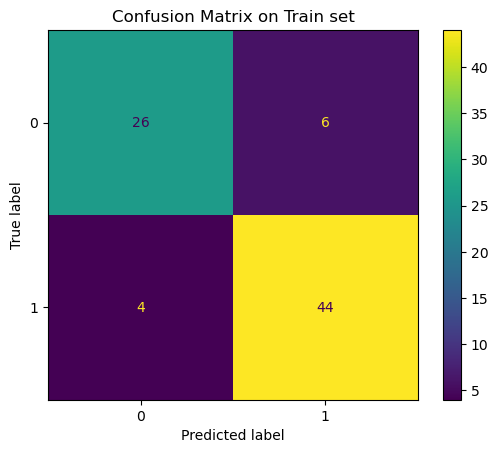

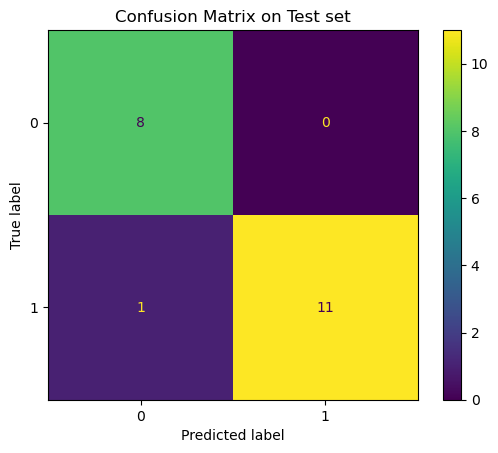

In [35]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

**From the questions above, we can deduce that the generalized performances are very good ! Indeed, the test accuracy is comparable to the train accuracy and we can see in the confusion matrix that the prediction errors are very rare 🥳🥳**

14. Produce the ROC curve for the train set and the test set

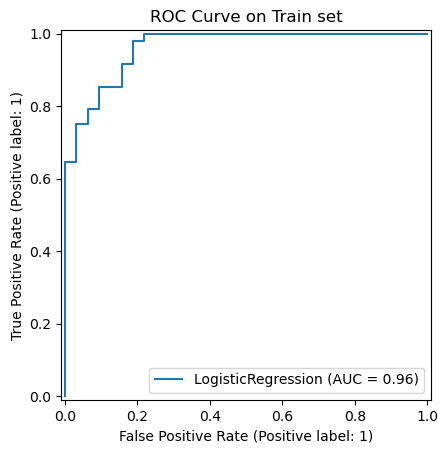

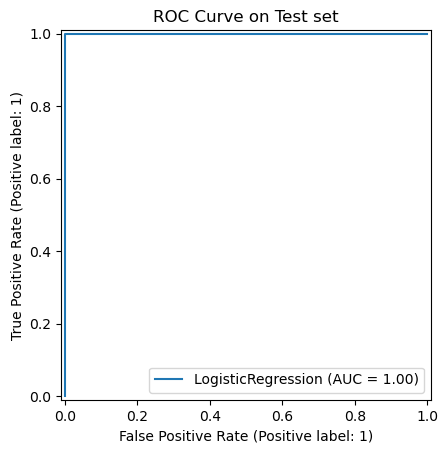

In [36]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

**The area under the curves is quite close to 1. This means that the model is robust as it does not depend on the choice of the threshold used in the logistic regression.**

15. Create a DataFrame named predictions_df_train that contains the following values on train set:
* explanatory variables "Col_1" and "Col_2"
* the target variable Y
* the predictions Y_pred 
* the estimated probabilites from the classifier. 

Sort the values according to the probabilities (in ascending order).

In [37]:
predictions_df_train = pd.DataFrame(X_train, columns = ['Col_1', 'Col_2'])
predictions_df_train["Y"] = Y_train.tolist()
predictions_df_train["Y_pred"] = Y_train_pred.tolist()
predictions_df_train["Proba"] = Y_train_proba[:,1]
predictions_df_train = predictions_df_train.sort_values(by="Proba")
predictions_df_train.head()

,Col_1,Col_2,Y,Y_pred,Proba
66,-1.771519,-1.210111,0,0,0.005923
44,-1.649222,-1.241779,0,0,0.007231
59,-1.782960,-0.903145,0,0,0.010260
45,-0.506668,-1.658564,0,0,0.036487
8,-1.558775,-0.321138,0,0,0.047638


16. Plot the probabilities as a function of the variables "Col_1" and "Col_2". Change the marker color according to the values of "Y_pred".

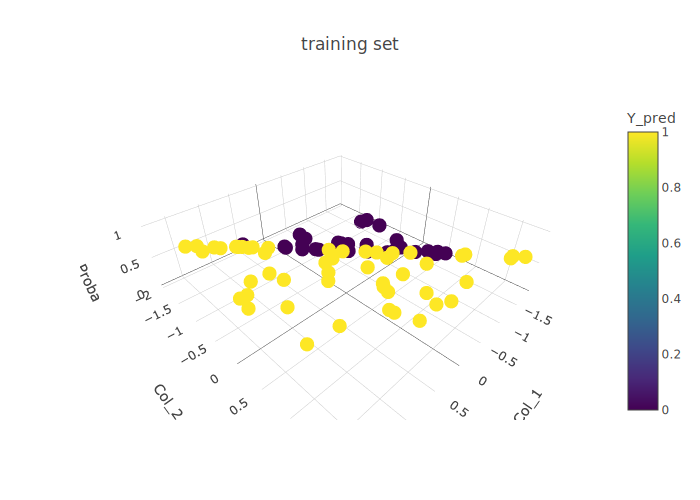

In [38]:
# Visualize the model
# Visualize predictions on training Set
fig = px.scatter_3d(predictions_df_train, x = 'Col_1', y = 'Col_2', z = 'Proba', title = "training set", color = 'Y_pred')
fig.show()

In [40]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.3 MB/s eta 0:00:00


17. Use the library mlxtend to plot the decision boundary of the model. You might need to install it before : 
```python
!pip install mlxtend
```
This documentation page might help you 😉 : http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/

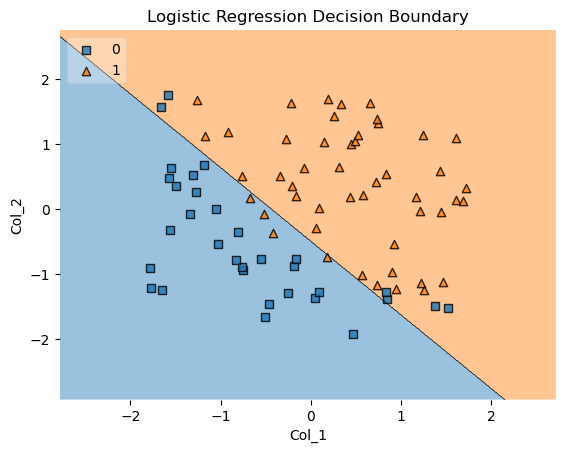

In [41]:
from mlxtend.plotting import plot_decision_regions


X = predictions_df_train.iloc[:,:2].values
Y = predictions_df_train.loc[:,"Y"].values

# Plotting decision regions
plot_decision_regions(X, Y, clf=classifier, legend=2)

# Adding axes annotations
plt.xlabel('Col_1')
plt.ylabel('Col_2')
plt.title('Logistic Regression Decision Boundary')
plt.show()